# Cloud Condition Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### Creating Dataframe

In [2]:
raw_data= pd.read_csv("train_CloudCondition.csv")
raw_data.shape

(71428, 12)

Data is of 71428 days and 11 parameters describing the weather conditions on that day

In [3]:
raw_data.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,rain,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,2,Partly Cloudy,rain,15,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,3,Partly Cloudy,rain,33,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,4,Partly Cloudy,snow,30,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,5,Partly Cloudy,snow,27,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


In [4]:
raw_data.tail()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
71423,79996,Foggy,rain,39,31.0,0.243553,19.0,347.0,14.0,1013.0,Frost,1269
71424,79997,Foggy,rain,8,4.0,0.913108,1.0,101.0,8.0,1031.0,Dry,1224
71425,79998,Mostly Cloudy,rain,28,-22.0,0.496076,2.0,149.0,7.0,1032.0,Frost,1463
71426,79999,Mostly Cloudy,rain,-16,-3.0,0.783161,44.0,266.0,11.0,1019.0,Fog,1251
71427,80000,Mostly Cloudy,rain,-15,8.0,0.191555,38.0,154.0,6.0,1023.0,Fog,1258


In [5]:
raw_data.columns 

Index(['Day', 'Cloud_Condition', 'Rain_OR_SNOW', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Condensation', 'Solar irradiance intensity'],
      dtype='object')

In [6]:
raw_data.dtypes

Day                             int64
Cloud_Condition                object
Rain_OR_SNOW                   object
Temperature (C)                object
Apparent Temperature (C)      float64
Humidity                      float64
Wind Speed (km/h)             float64
Wind Bearing (degrees)        float64
Visibility (km)               float64
Pressure (millibars)          float64
Condensation                   object
Solar irradiance intensity      int64
dtype: object

**Data Description**

1. Day variable specifies the day of weather conditions, however it is not continous(Not all days are mentioned). Hence, for now lets start by dropping the Day variable, we might later do changes

2. Cloud_condition is the independent (Y) variable. It is a discrete variable, hence we conclude that we have labelled data to go forward with supervised form of learning(Classification)

3. 'Rain_OR_SNOW', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Condensation' and 'Solar irradiance intensity' are dependent(X) variables.

4. Out of the X variables, 'Rain_OR_SNOW' and 'Condensation' are categorical and rest are numerical {Note: 'Temperature (C)' will be converted to int later}



### Data Cleanup and Exploratory Data Analysis

In [7]:
raw_data_dup = raw_data[raw_data.duplicated()]
raw_data_dup

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity


There are no duplicates

In [8]:
# raw_data = raw_data.iloc[:, 1:] 

In [9]:
raw_data.head(2)

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,rain,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,2,Partly Cloudy,rain,15,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291


In [10]:
raw_data.tail(2)

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
71426,79999,Mostly Cloudy,rain,-16,-3.0,0.783161,44.0,266.0,11.0,1019.0,Fog,1251
71427,80000,Mostly Cloudy,rain,-15,8.0,0.191555,38.0,154.0,6.0,1023.0,Fog,1258


In [11]:
# raw_data["Temperature (C)"] = raw_data["Temperature (C)"].astype(float)

In [12]:
raw_data.iloc[:,1:].describe()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
count,71425.000000,71427.000000,71426.000000,71391.000000,71408.000000,71363.000000,71428.000000
mean,5.550606,0.501020,31.525831,179.221793,8.014606,1022.980606,1249.736546
std,19.093822,0.289431,18.507098,103.729210,4.907893,13.559828,144.828721
min,-27.000000,0.000019,0.000000,0.000000,0.000000,1000.000000,1000.000000
25%,-11.000000,0.249233,16.000000,89.000000,4.000000,1011.000000,1124.000000
50%,5.000000,0.501461,31.000000,180.000000,8.000000,1023.000000,1249.000000
75%,22.000000,0.751978,48.000000,269.000000,12.000000,1035.000000,1375.000000
max,38.000000,0.999990,63.000000,359.000000,16.000000,1046.000000,1500.000000


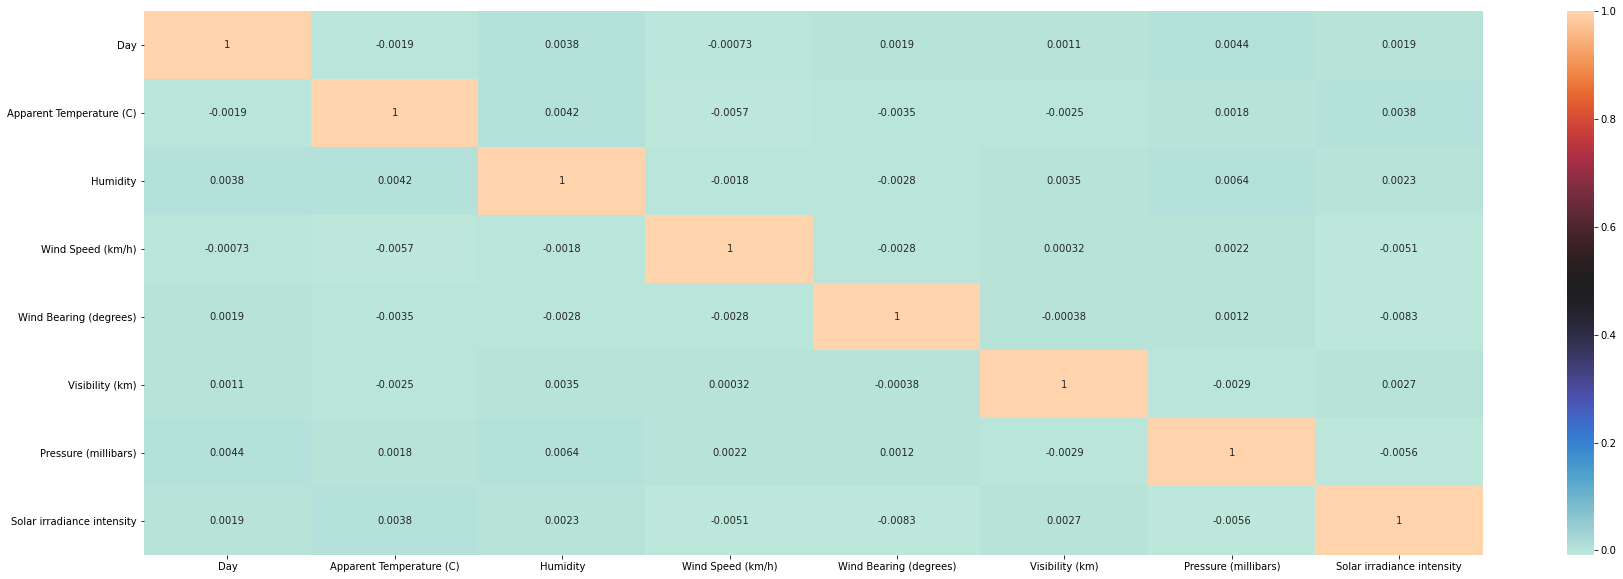

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,10))
cor = raw_data.corr()
Corr_heatmap=sns.heatmap(cor,cmap='icefire',annot=True)
plt.show()

1. Seems that there are some missing values in the data 
2. Temperature variable has some string values

In [13]:
raw_data["Temperature (C)"].unique()

array(['-13', '15', '33', '30', '27', '-17', '-5', '-14', '10', '7', '9',
       '20', '3', '29', '-8', '-15', '-20', '36', '32', '6', '17', '28',
       '-21', '23', '-4', '25', '-7', '16', '39', '-1', '13', '35', '22',
       '12', '14', '1', '8', '-3', '38', '5', '37', '-10', '19', '34',
       '26', '0', '24', '11', '21', '-9', '-2', '4', '-19', '-6', '2',
       '-16', '-11', '18', '31', '-18', '-12', nan, '-', 16, 30, 17, -13,
       36, 4, 9, 10, 13, 27, -8, -16, 34, 2, -11, -9, -10, -5, 39, 14, 7,
       20, -3, 15, 24, 35, 25, -12, 26, -14, 19, 5, 38, -4, -17, 0, 8, 21,
       -20, -21, 37, 22, 11, 28, 12, -18, 29, 1, -2, -7, -6, 33, 3, 32,
       -1, 6, -15, 18, 23, 31, -19], dtype=object)

In [14]:
raw_data["Temperature (C)"].replace('-', np.nan, inplace = True)
raw_data["Temperature (C)"] = raw_data["Temperature (C)"].astype(float)

In [15]:
raw_data["Temperature (C)"].unique()

array([-13.,  15.,  33.,  30.,  27., -17.,  -5., -14.,  10.,   7.,   9.,
        20.,   3.,  29.,  -8., -15., -20.,  36.,  32.,   6.,  17.,  28.,
       -21.,  23.,  -4.,  25.,  -7.,  16.,  39.,  -1.,  13.,  35.,  22.,
        12.,  14.,   1.,   8.,  -3.,  38.,   5.,  37., -10.,  19.,  34.,
        26.,   0.,  24.,  11.,  21.,  -9.,  -2.,   4., -19.,  -6.,   2.,
       -16., -11.,  18.,  31., -18., -12.,  nan])

In [16]:
raw_data.isnull().sum()

Day                             0
Cloud_Condition                 0
Rain_OR_SNOW                  115
Temperature (C)               253
Apparent Temperature (C)        3
Humidity                        1
Wind Speed (km/h)               2
Wind Bearing (degrees)         37
Visibility (km)                20
Pressure (millibars)           65
Condensation                    0
Solar irradiance intensity      0
dtype: int64

In [17]:
raw_data.iloc[:,1:].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Solar irradiance intensity
count,71175.000000,71425.000000,71427.000000,71426.000000,71391.000000,71408.000000,71363.000000,71428.000000
mean,8.962487,5.550606,0.501020,31.525831,179.221793,8.014606,1022.980606,1249.736546
std,17.628673,19.093822,0.289431,18.507098,103.729210,4.907893,13.559828,144.828721
min,-21.000000,-27.000000,0.000019,0.000000,0.000000,0.000000,1000.000000,1000.000000
25%,-6.000000,-11.000000,0.249233,16.000000,89.000000,4.000000,1011.000000,1124.000000
50%,9.000000,5.000000,0.501461,31.000000,180.000000,8.000000,1023.000000,1249.000000
75%,24.000000,22.000000,0.751978,48.000000,269.000000,12.000000,1035.000000,1375.000000
max,39.000000,38.000000,0.999990,63.000000,359.000000,16.000000,1046.000000,1500.000000


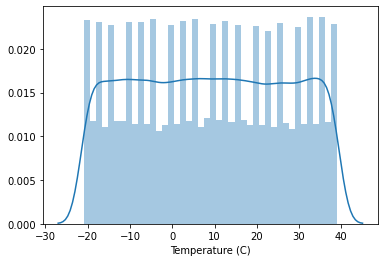

In [18]:
sns.distplot(raw_data['Temperature (C)'])

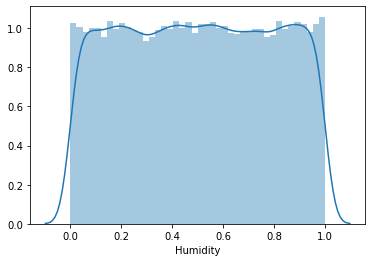

In [19]:
sns.distplot(raw_data['Humidity'])

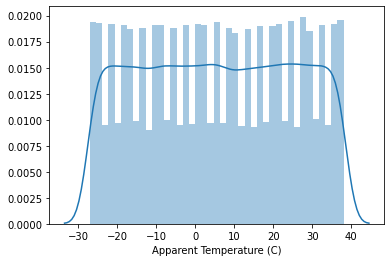

In [20]:
sns.distplot(raw_data['Apparent Temperature (C)'])

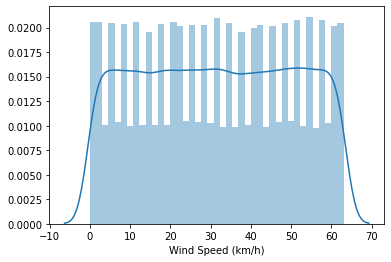

In [21]:
sns.distplot(raw_data['Wind Speed (km/h)'])

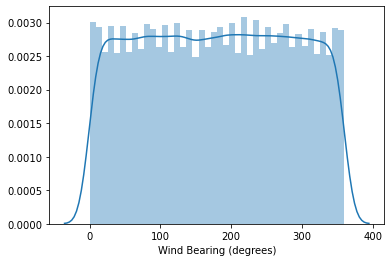

In [22]:
sns.distplot(raw_data['Wind Bearing (degrees)'])

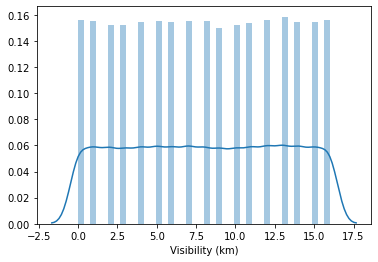

In [23]:
sns.distplot(raw_data['Visibility (km)'])

ValueError: could not convert string to float: 'rain'

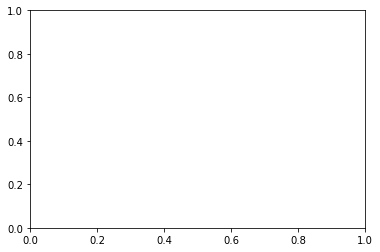

In [24]:
sns.distplot(raw_data['Rain_OR_SNOW'])

In [ ]:
sns.distplot(raw_data['Temperature (C)'])

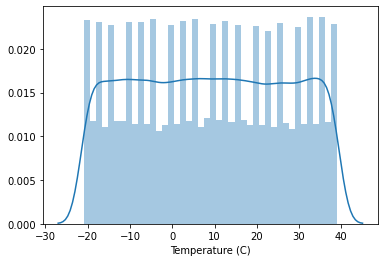

In [25]:
sns.distplot(raw_data['Temperature (C)'])

In [105]:
raw_data["Condensation"].unique()

array(['Frost', 'Dry', 'Fog', 'Mist'], dtype=object)

In [106]:
raw_data["Condensation"].value_counts()

Mist     21685
Fog      21222
Frost    14394
Dry      14127
Name: Condensation, dtype: int64

In [47]:
raw_data = raw_data.dropna()

In [48]:
raw_data.shape

(71053, 12)

In [49]:
#List Of categorical Columns and Numerical Columns(Except target variable)
cat=[]
num=[]
for x in raw_data.columns[2:]:
    if raw_data[x].dtype=="object":
        cat.append(x)
    else:
        num.append(x)

In [50]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for x in cat:
    raw_data[x]=le.fit_transform(raw_data[x])

In [51]:
raw_data.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,0,-13.0,-19.0,0.134364,17.0,68.0,4.0,1008.0,2,1068
1,2,Partly Cloudy,0,15.0,5.0,0.847434,8.0,291.0,2.0,1036.0,2,1291
2,3,Partly Cloudy,0,33.0,-12.0,0.763775,32.0,32.0,8.0,1004.0,0,1433
3,4,Partly Cloudy,1,30.0,36.0,0.255069,15.0,130.0,3.0,1016.0,0,1410
4,5,Partly Cloudy,1,27.0,30.0,0.495435,63.0,60.0,15.0,1007.0,1,1391


In [52]:
raw_data.dtypes

Day                             int64
Cloud_Condition                object
Rain_OR_SNOW                    int32
Temperature (C)               float64
Apparent Temperature (C)      float64
Humidity                      float64
Wind Speed (km/h)             float64
Wind Bearing (degrees)        float64
Visibility (km)               float64
Pressure (millibars)          float64
Condensation                    int32
Solar irradiance intensity      int64
dtype: object

In [53]:
raw_data["Cloud_Condition"].value_counts()

Mostly Cloudy               21915
Partly Cloudy               17549
Overcast                    13539
Clear                        9652
Foggy                        5871
Breezy and Dry                630
Breezy and Mostly Cloudy      467
Breezy and Overcast           452
Unknown                       419
Breezy and Partly Cloudy      350
Light Rain                    209
Name: Cloud_Condition, dtype: int64

In [54]:
# Unknown = ["Dry and Partly Cloudy", "Windy and Partly Cloudy ", "Breezy", "Windy and Overcast", "Dry", "Breezy and Foggy", 
#                  "Humid and Mostly Cloudy", "Windy and Mostly Cloudy", "Humid and Partly Cloudy", "Dry and Mostly Cloudy", 
#                  "Humid and Overcast", "Windy", "Drizzle", "Windy and Foggy", "Windy and Dry", 
#                  "Dangerously Windy and Partly Cloudy"]
# for value in raw_data["Cloud_Condition"]:
#     if value in Unknown:
#         raw_data[value].replace("Unknown",inplace=True)

In [55]:
# raw_data['Cloud_Condition'].replace("Breezy","Unknown",inplace = True)
# # raw_data['Cloud_Condition'].replace("Breezy and Dry","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Breezy and Foggy","Unknown",inplace = True)
# # raw_data['Cloud_Condition'].replace("Breezy and Mostly Cloudy","Unknown",inplace = True)
# # raw_data['Cloud_Condition'].replace("Breezy and Overcast","Unknown",inplace = True)
# # raw_data['Cloud_Condition'].replace("Breezy and Partly Cloudy","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Clear","Clear",inplace = True)
# raw_data['Cloud_Condition'].replace("Dangerously Windy and Partly Cloudy","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Drizzle","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Dry","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Dry and Mostly Cloudy","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Dry and Partly Cloudy","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Foggy","Foggy",inplace = True)
# raw_data['Cloud_Condition'].replace("Humid and Mostly Cloudy","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Humid and Overcast","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Humid and Partly Cloudy","Unknown",inplace = True)
# # raw_data['Cloud_Condition'].replace("Light Rain","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Mostly Cloudy","Mostly Cloudy",inplace = True)
# raw_data['Cloud_Condition'].replace("Overcast","Overcast",inplace = True)
# raw_data['Cloud_Condition'].replace("Partly Cloudy","Partly Cloudy",inplace = True)
# raw_data['Cloud_Condition'].replace("Windy","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Windy and Dry","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Windy and Foggy","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Windy and Mostly Cloudy","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Windy and Overcast","Unknown",inplace = True)
# raw_data['Cloud_Condition'].replace("Windy and Partly Cloudy","Unknown",inplace = True)

In [56]:
working_data = raw_data

In [57]:
working_data["Cloud_Condition"].value_counts()

Mostly Cloudy               21915
Partly Cloudy               17549
Overcast                    13539
Clear                        9652
Foggy                        5871
Breezy and Dry                630
Breezy and Mostly Cloudy      467
Breezy and Overcast           452
Unknown                       419
Breezy and Partly Cloudy      350
Light Rain                    209
Name: Cloud_Condition, dtype: int64

In [58]:
# from sklearn import preprocessing
# Xg = ["Cloud_Condition"]
# le = preprocessing.LabelEncoder()

# for x in Xg:
#     raw_data[x]=le.fit_transform(raw_data[x])

In [59]:
working_data

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,0,-13.0,-19.0,0.134364,17.0,68.0,4.0,1008.0,2,1068
1,2,Partly Cloudy,0,15.0,5.0,0.847434,8.0,291.0,2.0,1036.0,2,1291
2,3,Partly Cloudy,0,33.0,-12.0,0.763775,32.0,32.0,8.0,1004.0,0,1433
3,4,Partly Cloudy,1,30.0,36.0,0.255069,15.0,130.0,3.0,1016.0,0,1410
4,5,Partly Cloudy,1,27.0,30.0,0.495435,63.0,60.0,15.0,1007.0,1,1391
...,...,...,...,...,...,...,...,...,...,...,...,...
71423,79996,Foggy,0,39.0,31.0,0.243553,19.0,347.0,14.0,1013.0,2,1269
71424,79997,Foggy,0,8.0,4.0,0.913108,1.0,101.0,8.0,1031.0,0,1224
71425,79998,Mostly Cloudy,0,28.0,-22.0,0.496076,2.0,149.0,7.0,1032.0,2,1463
71426,79999,Mostly Cloudy,0,-16.0,-3.0,0.783161,44.0,266.0,11.0,1019.0,1,1251


In [60]:
X = working_data.values[:, 2:]
Y = working_data.values[:, 1]

In [61]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
#scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [63]:
X.shape

(71053, 10)

In [64]:
Y.shape

(71053,)

### Gradient Boosting

In [65]:
#predicting using the AdaBoost_Classifier
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoost=GradientBoostingClassifier(random_state=10, n_estimators=200,
    criterion='friedman_mse',
    min_samples_split=200,
    min_samples_leaf=100)

#fit the model on the data and predict the values
model_GradientBoost.fit(X_train ,Y_train)

GradientBoostingClassifier(min_samples_leaf=100, min_samples_split=200,
                           n_estimators=200, random_state=10)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

Y_pred = model_GradientBoost.predict(X_test)

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[   0    0    0    0    0    8    0  111    0   14    0]
 [   0    0    0    0    0    4    0   82    2   12    0]
 [   0    0    0    0    0    4    0   71    3    8    0]
 [   0    0    0    0    0    1    0   66    2    1    0]
 [   0    0    0    0    0  165    0 1524   86  141    0]
 [   0    0    0    0    0  372    0  600  165   50    0]
 [   0    0    0    0    0    7    0   35    4    4    0]
 [   0    0    0    0    0  198    0 3728  114  344    0]
 [   0    0    0    0    0  335    0 2051  163  173    0]
 [   0    0    0    0    0  148    0 3017   67  250    0]
 [   0    0    0    0    0    7    0   70    2    2    0]]
Classification report: 
                          precision    recall  f1-score   support

          Breezy and Dry       0.00      0.00      0.00       133
Breezy and Mostly Cloudy       0.00      0.00      0.00       100
     Breezy and Overcast       0.00      0.00      0.00        86
Breezy and Partly Cloudy       0.00      0.00      0.00        70
      

### Decision Tree

In [67]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree= DecisionTreeClassifier(criterion="entropy",
                                           splitter ="best",
                                          random_state=10,
                                          min_samples_leaf=500,
                                          min_samples_split=100,
                                          max_depth=7)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[   0    0    0    0    0    8    0  124    1    0    0]
 [   0    0    0    0    0    4    0   94    2    0    0]
 [   0    0    0    0    0    6    0   79    1    0    0]
 [   0    0    0    0    0    1    0   69    0    0    0]
 [   0    0    0    0    0  217    0 1672   27    0    0]
 [   0    0    0    0    0  471    0  648   68    0    0]
 [   0    0    0    0    0   10    0   39    1    0    0]
 [   0    0    0    0    0  257    0 4077   50    0    0]
 [   0    0    0    0    0  403    0 2230   89    0    0]
 [   0    0    0    0    0  182    0 3268   32    0    0]
 [   0    0    0    0    0    7    0   72    2    0    0]]
Classification report: 
                          precision    recall  f1-score   support

          Breezy and Dry       0.00      0.00      0.00       133
Breezy and Mostly Cloudy       0.00      0.00      0.00       100
     Breezy and Overcast       0.00      0.00      0.00        86
Breezy and Partly Cloudy       0.00      0.00      0.00        70
      

In [69]:
model_DecisionTree.score(X_train,Y_train)

0.32614967805495937

### Random Forest

In [70]:
#predicting using the Decision_Tree_Classifier
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(random_state=10,criterion="gini",min_samples_leaf=5,
                                    min_samples_split=5,bootstrap=True,max_depth=5)

#fit the model on the data and predict the values
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[   0    0    0    0    0    8    0  124    1    0    0]
 [   0    0    0    0    0    4    0   93    2    1    0]
 [   0    0    0    0    0    5    0   78    2    1    0]
 [   0    0    0    0    0    1    0   69    0    0    0]
 [   0    0    0    0    0  164    0 1672   79    1    0]
 [   0    0    0    0    0  365    0  646  174    2    0]
 [   0    0    0    0    0    5    0   39    6    0    0]
 [   0    0    0    0    0  171    0 4079  128    6    0]
 [   0    0    0    0    0  294    0 2230  195    3    0]
 [   0    0    0    0    0  139    0 3273   70    0    0]
 [   0    0    0    0    0    5    0   72    4    0    0]]
Classification report: 
                          precision    recall  f1-score   support

          Breezy and Dry       0.00      0.00      0.00       133
Breezy and Mostly Cloudy       0.00      0.00      0.00       100
     Breezy and Overcast       0.00      0.00      0.00        86
Breezy and Partly Cloudy       0.00      0.00      0.00        70
      

### ExtraTree

In [72]:
#predicting using the Extra_Tree_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model= ExtraTreesClassifier(n_estimators=100,
                                          random_state=10)

#fit the model on the data and predict the values
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[   0    0    0    0    3    5    0   80    6   39    0]
 [   0    0    0    0    0    4    0   60    7   29    0]
 [   0    0    0    0    2    3    0   57    5   19    0]
 [   0    0    0    0    0    0    0   53    4   13    0]
 [   0    0    0    0   21  139    0 1162  132  462    0]
 [   0    0    0    0   19  296    0  492  221  159    0]
 [   0    0    0    0    0    7    0   21    6   16    0]
 [   0    0    0    0   64  163    0 2797  279 1081    0]
 [   0    0    0    0   37  274    0 1555  267  589    0]
 [   0    0    0    0   49  121    0 2243  213  856    0]
 [   0    0    0    0    1    7    0   45    8   20    0]]
Classification report: 
                          precision    recall  f1-score   support

          Breezy and Dry       0.00      0.00      0.00       133
Breezy and Mostly Cloudy       0.00      0.00      0.00       100
     Breezy and Overcast       0.00      0.00      0.00        86
Breezy and Partly Cloudy       0.00      0.00      0.00        70
      

### AdaBoost 

In [74]:
# predicting using the AdaBoost_Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


model_AdaBoost=AdaBoostClassifier(base_estimator= RandomForestClassifier(random_state=10,n_estimators=86,criterion="entropy",min_samples_leaf=100,
                                    min_samples_split=80,bootstrap=False,max_depth=10),n_estimators=200, learning_rate=0.1 )
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

### KNN

In [ ]:
# #predicting using the KNeighbors_classifier
# from sklearn.neighbors import KNeighborsClassifier
# model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric= "minkowski")
# #euclidean,manhattan,minkowski
# #fit the model on the data and predict the values

# model_KNN.fit(X_train,Y_train)
# Y_pred=model_KNN.predict(X_test)
# # print(list(zip(Y_test,Y_pred)))


In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score, \
# classification_report

# cfm=confusion_matrix(Y_test,Y_pred)
# print(cfm)

# print("Classification report: ")

# print(classification_report(Y_test,Y_pred))

# acc=accuracy_score(Y_test, Y_pred)
# print("Accuracy of the model: ",acc)

### XGBoost

In [ ]:
# from xgboost import XGBClassifier


# model_XGBClassifier=XGBClassifier(n_estimators=200, max_depth=5, max_leaves=10,
#                                   random_state=10)
# #fit the model on the data and predict the values
# model_XGBClassifier.fit(X_train,Y_train)
# Y_pred=model_XGBClassifier.predict(X_test)

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score, \
# classification_report

# cfm=confusion_matrix(Y_test,Y_pred)
# print(cfm)

# print("Classification report: ")

# print(classification_report(Y_test,Y_pred))

# acc=accuracy_score(Y_test, Y_pred)
# print("Accuracy of the model: ",acc)

### Ensemble

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import VotingClassifier
# from sklearn.neighbors import KNeighborsClassifier

# # create the sub models
# estimators = []
# # model1 = LogisticRegression()
# # estimators.append(('log', model1))
# model2 = DecisionTreeClassifier(criterion='gini',random_state=10)
# estimators.append(('cart', model2))
# model3 = SVC(kernel="rbf", C=90,gamma=0.1)
# estimators.append(('svm', model3))
# # model4 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# # estimators.append(('knn', model4))


# # create the ensemble model
# ensemble = VotingClassifier(estimators)
# ensemble.fit(X_train,Y_train)
# Y_pred=ensemble.predict(X_test)
# #print(Y_pred)

In [46]:
# from sklearn.metrics import confusion_matrix, accuracy_score, \
# classification_report

# cfm=confusion_matrix(Y_test,Y_pred)
# print(cfm)

# print("Classification report: ")

# print(classification_report(Y_test,Y_pred))

# acc=accuracy_score(Y_test, Y_pred)
# print("Accuracy of the model: ",acc)

NameError: name 'Y_pred' is not defined

### SVM

In [75]:
from sklearn.svm import SVC
svc_model= SVC()
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

['Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Mostly Cloudy', 'Foggy', 'Mostly Cloudy', 'Mostly Cloudy', 'Foggy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Foggy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Mostly Cloudy', 'Overcast', 'Mostly Cloudy', 'Foggy',

In [76]:
svc_model.score(X_train,Y_train)

#score-->
#Y_pred= svc_model.predict(X_train)
#accuracy_score(Y_train,Y_pred)

0.3332746912494282

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

Y_pred=svc_model.predict(X_test)
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[   0    0    0    0    0    7    0  124    2    0    0]
 [   0    0    0    0    0    5    0   94    1    0    0]
 [   0    0    0    0    0    6    0   79    1    0    0]
 [   0    0    0    0    0    1    0   69    0    0    0]
 [   0    0    0    0    0  184    0 1668   59    5    0]
 [   0    0    0    0    0  398    0  645  141    3    0]
 [   0    0    0    0    0    8    0   39    3    0    0]
 [   0    0    0    0    0  213    0 4076   86    9    0]
 [   0    0    0    0    0  357    0 2225  134    6    0]
 [   0    0    0    0    0  159    0 3256   51   16    0]
 [   0    0    0    0    0    9    0   72    0    0    0]]
Classification report: 
                          precision    recall  f1-score   support

          Breezy and Dry       0.00      0.00      0.00       133
Breezy and Mostly Cloudy       0.00      0.00      0.00       100
     Breezy and Overcast       0.00      0.00      0.00        86
Breezy and Partly Cloudy       0.00      0.00      0.00        70
      

In [40]:
from  sklearn import svm

svc_model = svm.SVC(kernel="poly")

parameter_space = {
#     "kernel" :["linear","rbf","poly","sigmoid"],
    "gamma" :[0.1,0.01,0.001],
    "C": [1,5,8,10,20]
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svc_model, parameter_space, n_jobs=-1,cv=3)

In [ ]:
clf.fit(X_train,Y_train)

In [ ]:
print('Best parameters found:\n', clf.best_params_)

In [75]:
Test_data = pd.read_csv("test_CloudCondition.csv")
Test_data.shape

(16452, 11)

In [76]:
Test_data.head()

,Day,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,80002,rain,1.0,0.0,0.078150,17.0,300,10.0,1029.0,Fog,1399
1,80003,rain,-3.0,25.0,0.653251,25.0,322,0.0,1009.0,Dry,1468
2,80004,rain,18.0,17.0,0.930970,37.0,330,12.0,1045.0,Dry,1152
3,80005,rain,33.0,-12.0,0.778844,50.0,350,3.0,1022.0,Fog,1003
4,80006,rain,25.0,-19.0,0.491523,62.0,300,12.0,1042.0,Fog,1228


In [77]:
Test_data.isnull().sum()

Day                           0
Rain_OR_SNOW                  0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Condensation                  0
Solar irradiance intensity    0
dtype: int64

In [78]:
Test_data.dtypes

Day                             int64
Rain_OR_SNOW                   object
Temperature (C)               float64
Apparent Temperature (C)      float64
Humidity                      float64
Wind Speed (km/h)             float64
Wind Bearing (degrees)          int64
Visibility (km)               float64
Pressure (millibars)          float64
Condensation                   object
Solar irradiance intensity      int64
dtype: object

In [79]:
#List Of categorical Columns and Numerical Columns(Except target variable)
cat=[]
num=[]
for x in Test_data.columns[:]:
    if Test_data[x].dtype=="object":
        cat.append(x)
    else:
        num.append(x)

In [80]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for x in cat:
    Test_data[x]=le.fit_transform(Test_data[x])

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
#scaler.fit_transform(X_train)
# X_train = scaler.transform(X_train)
Test=scaler.transform(Test_data.iloc[:,1:])

In [82]:
Test

array([[-2.85007456e-16,  1.00000000e+00, -1.11775298e-15, ...,
         1.02900000e+03,  1.00000000e+00,  1.39900000e+03],
       [-2.85007456e-16, -3.00000000e+00,  2.50000000e+01, ...,
         1.00900000e+03, -2.88521043e-16,  1.46800000e+03],
       [-2.85007456e-16,  1.80000000e+01,  1.70000000e+01, ...,
         1.04500000e+03, -2.88521043e-16,  1.15200000e+03],
       ...,
       [-2.85007456e-16,  2.20388889e+01,  4.40166667e+01, ...,
         1.01566000e+03,  3.00000000e+00,  1.00800000e+03],
       [-2.85007456e-16,  2.15222222e+01,  4.57722222e+01, ...,
         1.01595000e+03,  1.00000000e+00,  1.36900000e+03],
       [-2.85007456e-16,  2.04388889e+01,  4.75277778e+01, ...,
         1.01616000e+03, -2.88521043e-16,  1.24400000e+03]])

In [83]:
# Test = Test_data.values[:,1:]

In [ ]:
# Y_pred=model_GradientBoost.predict(Test)
# Y_pred = model_DecisionTree.predict(Test)
# Y_pred_new=svc_model.predict(Test)
Y_pred=model_AdaBoost.predict(Test)
# Y_pred=model_KNN.predict(Test)



In [ ]:
# Y_pred= pd.DataFrame(Y_pred)

In [ ]:
# Y_pred = le.inverse_transform(Y_pred)

In [ ]:
Sol = pd.DataFrame({ "Day":Test_data.Day, 'Cloud_Condition': Y_pred })

In [88]:
Sol.to_csv("SVMSol9.csv", index= False)

NameError: name 'Sol' is not defined

In [81]:
# Sol1['Cloud_Condition'].replace(0,"Breezy",inplace = True)
# Sol1['Cloud_Condition'].replace(1,"Breezy and Dry",inplace = True)
# Sol1['Cloud_Condition'].replace(2,"Breezy and Foggy",inplace = True)
# Sol1['Cloud_Condition'].replace(3,"Breezy and Mostly Cloudy",inplace = True)
# Sol1['Cloud_Condition'].replace(4,"Breezy and Overcast",inplace = True)
# Sol1['Cloud_Condition'].replace(5,"Breezy and Partly Cloudy",inplace = True)
# Sol1['Cloud_Condition'].replace(6,"Clear",inplace = True)
# Sol1['Cloud_Condition'].replace(7,"Dangerously Windy and Partly Cloudy",inplace = True)
# Sol1['Cloud_Condition'].replace(8,"Drizzle",inplace = True)
# Sol1['Cloud_Condition'].replace(9,"Dry",inplace = True)
# Sol1['Cloud_Condition'].replace(10,"Dry and Mostly Cloudy",inplace = True)
# Sol1['Cloud_Condition'].replace(11,"Dry and Partly Cloudy",inplace = True)
# Sol1['Cloud_Condition'].replace(12,"Foggy",inplace = True)
# Sol1['Cloud_Condition'].replace(13,"Humid and Mostly Cloudy",inplace = True)
# Sol1['Cloud_Condition'].replace(14,"Humid and Overcast",inplace = True)
# Sol1['Cloud_Condition'].replace(15,"Humid and Partly Cloudy",inplace = True)
# Sol1['Cloud_Condition'].replace(16,"Light Rain",inplace = True)
# Sol1['Cloud_Condition'].replace(17,"Mostly Cloudy",inplace = True)
# Sol1['Cloud_Condition'].replace(18,"Overcast",inplace = True)
# Sol1['Cloud_Condition'].replace(19,"Partly Cloudy",inplace = True)
# Sol1['Cloud_Condition'].replace(20,"Windy",inplace = True)
# Sol1['Cloud_Condition'].replace(21,"Windy and Dry",inplace = True)
# Sol1['Cloud_Condition'].replace(22,"Windy and Foggy",inplace = True)
# Sol1['Cloud_Condition'].replace(23,"Windy and Mostly Cloudy",inplace = True)
# Sol1['Cloud_Condition'].replace(24,"Windy and Overcast",inplace = True)
# Sol1['Cloud_Condition'].replace(25,"Windy and Partly Cloudy",inplace = True)